In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('parsed16_logs.csv')

In [4]:
df

,Ligand ID,Mode,Affinity (kcal/mol),RMSD Lower Bound,RMSD Upper Bound
0,ligand_61075335_docking,1,-6.364,0.000,0.000
1,ligand_61075335_docking,2,-5.687,2.367,5.799
2,ligand_61075335_docking,3,-5.401,11.710,14.280
3,ligand_61075335_docking,4,-5.233,3.304,5.040
4,ligand_61075335_docking,5,-5.120,10.310,12.640
...,...,...,...,...,...
44932,ligand_122550896_docking,5,-6.137,3.117,6.128
44933,ligand_122550896_docking,6,-5.545,3.586,6.484
44934,ligand_122550896_docking,7,-5.429,14.430,16.170
44935,ligand_122550896_docking,8,-5.383,3.183,4.083


In [5]:
df['Mode'].value_counts()

Mode
2    4998
5    4998
4    4996
6    4995
1    4993
8    4993
3    4992
7    4992
9    4980
Name: count, dtype: int64

In [6]:
best_df = df[df['Mode']==1]

In [7]:
import numpy as np
import pandas as pd

data = best_df['Affinity (kcal/mol)']
data

0       -6.364
9       -7.214
18      -8.037
27      -7.896
36      -6.385
         ...  
44892   -6.411
44901   -6.664
44910   -5.699
44919   -7.638
44928   -7.563
Name: Affinity (kcal/mol), Length: 4993, dtype: float64

In [8]:

mean = np.mean(data)
median = np.median(data)
mode = pd.Series(data).mode()[0]
variance = np.var(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = max_value - min_value

# Displaying results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Range: {range_value}")


Mean: -7.151194672541559
Median: -7.129
Mode: -7.178
Variance: 0.6426283382291789
Standard Deviation: 0.8016410282845925
Minimum: -9.981
Maximum: -4.241
Range: 5.74


In [9]:
sorted_df = best_df.sort_values(by='Affinity (kcal/mol)', ascending=True)

In [10]:
sorted_df

,Ligand ID,Mode,Affinity (kcal/mol),RMSD Lower Bound,RMSD Upper Bound
11034,ligand_155792348_docking,1,-9.981,0.0,0.0
40144,ligand_8171885_docking,1,-9.885,0.0,0.0
31803,ligand_54844255_docking,1,-9.872,0.0,0.0
4228,ligand_8842407_docking,1,-9.756,0.0,0.0
35040,ligand_155792345_docking,1,-9.641,0.0,0.0
...,...,...,...,...,...
34140,ligand_146358196_docking,1,-4.763,0.0,0.0
3760,ligand_55021188_docking,1,-4.742,0.0,0.0
36709,ligand_61304508_docking,1,-4.596,0.0,0.0
37869,ligand_25990402_docking,1,-4.379,0.0,0.0


In [11]:
top_ligands = sorted_df.head(10).iloc[:, :3].copy().reset_index(drop=True).drop(columns = ['Mode'])
top_ligands['Ligand ID'] = top_ligands['Ligand ID'].str.split('_').str[1].astype(int)
top_ligands.rename(columns={'Ligand ID': 'PubChem ID'}, inplace=True)


In [42]:
top_ligands.to_csv('topligands.csv')

In [41]:
from tabulate import tabulate
markdown_table = tabulate(top_ligands, headers='keys', tablefmt='pipe')
print(markdown_table)


|    |   PubChem ID |   Affinity (kcal/mol) |
|---:|-------------:|----------------------:|
|  0 |  1.55792e+08 |                -9.981 |
|  1 |  8.17188e+06 |                -9.885 |
|  2 |  5.48443e+07 |                -9.872 |
|  3 |  8.84241e+06 |                -9.756 |
|  4 |  1.55792e+08 |                -9.641 |
|  5 |  5.48115e+07 |                -9.637 |
|  6 |  5.48442e+07 |                -9.635 |
|  7 |  4.58613e+07 |                -9.592 |
|  8 |  5.48418e+07 |                -9.54  |
|  9 |  5.62951e+07 |                -9.519 |


In [15]:
top_list = top_ligands['PubChem ID'].tolist()

In [18]:
import requests
import os

# List of PubChem Compound IDs (CIDs)
pubchem_ids = top_list + [34755]

# Directory to save images
output_dir = "structure_images"
os.makedirs(output_dir, exist_ok=True)

# Base URL for PubChem API (structure images)
base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid"

# Loop through the PubChem IDs and download images
for cid in pubchem_ids:
    # Construct the URL for the PNG image
    image_url = f"{base_url}/{cid}/PNG"
    image_url = f"{base_url}/{cid}/PNG?image_2d=clean"

    # Make the request to download the image
    response = requests.get(image_url)
    
    if response.status_code == 200:
        # Save the image to the output directory
        file_path = os.path.join(output_dir, f"{cid}.png")
        with open(file_path, "wb") as image_file:
            image_file.write(response.content)
        print(f"Downloaded structure for CID {cid} to {file_path}")
    else:
        print(f"Failed to download structure for CID {cid}: {response.status_code}")

print("Download complete!")


Downloaded structure for CID 155792348 to structure_images/155792348.png
Downloaded structure for CID 8171885 to structure_images/8171885.png
Downloaded structure for CID 54844255 to structure_images/54844255.png
Downloaded structure for CID 8842407 to structure_images/8842407.png
Downloaded structure for CID 155792345 to structure_images/155792345.png
Downloaded structure for CID 54811489 to structure_images/54811489.png
Downloaded structure for CID 54844164 to structure_images/54844164.png
Downloaded structure for CID 45861272 to structure_images/45861272.png
Downloaded structure for CID 54841777 to structure_images/54841777.png
Downloaded structure for CID 56295120 to structure_images/56295120.png
Downloaded structure for CID 34755 to structure_images/34755.png
Download complete!


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Affinity distribution for best position')

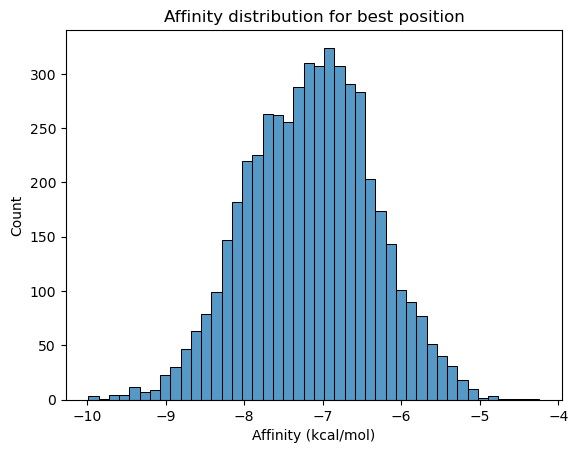

In [79]:
sns.histplot(best_df['Affinity (kcal/mol)'])
plt.title('Affinity distribution for best position')

In [85]:
df = pd.read_csv('bio_pre_filtered_sim.tsv', sep='\t', header=0)
filtered_rows = df[df['cid'].isin(top_ligands['PubChem ID'])]
filtered_rows.to_csv('top_10_ligands.tsv', sep = '\t', index=False)

In [34]:
ligandy = pd.read_csv('ligandy.txt', delim_whitespace=True, header= None)
ligandy

,0,1,2,3
0,JDN,2734361,CHEMBL342460,a
1,JF8,139030486,NaN,NaN
2,97T,578506,CHEMBL2148101,NaN
3,JBH,98396570,NaN,NaN
4,JB5,237859,CHEMBL3353658,NaN
5,JAE,68288,NaN,NaN
6,JAW,14973220,CHEMBL1435541,CHEBI:93599
7,5OB,78598,CHEMBL449325,NaN
8,JBN,7020483,NaN,NaN
9,J9Q,7162068,NaN,NaN


In [39]:
known_ligands_ids = ligandy.iloc[:,1].tolist()
known_ligands_ids

[2734361,
 139030486,
 578506,
 98396570,
 237859,
 68288,
 14973220,
 78598,
 7020483,
 7162068,
 319954,
 13775785,
 5360349,
 8706,
 236984,
 77887,
 16258,
 4115495,
 142179,
 190,
 68910199,
 139030491,
 145946018,
 139030495,
 139030496,
 145997887,
 139030501,
 68910199,
 139030484,
 139030485,
 139030487,
 139030488,
 139030489,
 139030490,
 139030492,
 139030493,
 139030497,
 139030498,
 139030500,
 139030502,
 2819674,
 2763205,
 21362592,
 145927357,
 117287823,
 145997883,
 145997884,
 523184,
 2799515,
 2756469,
 596767,
 145997882,
 145997885,
 145997886,
 65482,
 137347758,
 137347757,
 97429072,
 71724899]

In [40]:
import requests
import os

# List of PubChem Compound IDs (CIDs)
pubchem_ids = known_ligands_ids

# Directory to save images
output_dir = "known_ligands"
os.makedirs(output_dir, exist_ok=True)

# Base URL for PubChem API (structure images)
base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid"

# Loop through the PubChem IDs and download images
for cid in pubchem_ids:
    # Construct the URL for the PNG image
    image_url = f"{base_url}/{cid}/PNG"
    image_url = f"{base_url}/{cid}/PNG?image_2d=clean"

    # Make the request to download the image
    response = requests.get(image_url)
    
    if response.status_code == 200:
        # Save the image to the output directory
        file_path = os.path.join(output_dir, f"{cid}.png")
        with open(file_path, "wb") as image_file:
            image_file.write(response.content)
        print(f"Downloaded structure for CID {cid} to {file_path}")
    else:
        print(f"Failed to download structure for CID {cid}: {response.status_code}")

print("Download complete!")


Downloaded structure for CID 2734361 to known_ligands/2734361.png
Downloaded structure for CID 139030486 to known_ligands/139030486.png
Downloaded structure for CID 578506 to known_ligands/578506.png
Downloaded structure for CID 98396570 to known_ligands/98396570.png
Downloaded structure for CID 237859 to known_ligands/237859.png
Downloaded structure for CID 68288 to known_ligands/68288.png
Downloaded structure for CID 14973220 to known_ligands/14973220.png
Downloaded structure for CID 78598 to known_ligands/78598.png
Downloaded structure for CID 7020483 to known_ligands/7020483.png
Downloaded structure for CID 7162068 to known_ligands/7162068.png
Downloaded structure for CID 319954 to known_ligands/319954.png
Downloaded structure for CID 13775785 to known_ligands/13775785.png
Downloaded structure for CID 5360349 to known_ligands/5360349.png
Downloaded structure for CID 8706 to known_ligands/8706.png
Downloaded structure for CID 236984 to known_ligands/236984.png
Downloaded structure f

In [44]:
import requests

def fetch_bioassay(cid):
    base_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/assaysummary/JSON"
    response = requests.get(base_url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

cids = top_list
for cid in cids:
    bioassay_data = fetch_bioassay(cid)
    if bioassay_data:
        print(f"Bioassay Data for CID {cid}:")
        print(bioassay_data)
    else:
        print(f"Failed to fetch bioassay data for CID {cid}.")


Failed to fetch bioassay data for CID 155792348.


Failed to fetch bioassay data for CID 8171885.
Failed to fetch bioassay data for CID 54844255.
Failed to fetch bioassay data for CID 8842407.
Failed to fetch bioassay data for CID 155792345.
Failed to fetch bioassay data for CID 54811489.
Failed to fetch bioassay data for CID 54844164.
Failed to fetch bioassay data for CID 45861272.
Failed to fetch bioassay data for CID 54841777.
Failed to fetch bioassay data for CID 56295120.


In [51]:
links = []
for cid in cids:
    links.append(f"https://pubchem.ncbi.nlm.nih.gov/compound/{cid}")
pd.DataFrame(links).to_csv('links.txt', sep = ' ', header= None)

In [45]:
import requests

def fetch_data(cid, data_type):
    base_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/{data_type}/JSON"
    response = requests.get(base_url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

cids = top_list

for cid in cids:
    print(f"Fetching data for CID {cid}...")
    
    # Fetch basic compound information
    compound_data = fetch_data(cid, "")
    if compound_data:
        print(f"Compound Data: {compound_data.get('Record', {}).get('RecordTitle', 'N/A')}")

    # Fetch bioassay data
    bioassay_data = fetch_data(cid, "assaysummary")
    if bioassay_data:
        print(f"Bioassay Summary: {bioassay_data}")

    # Fetch PubMed references
    pubmed_data = fetch_data(cid, "xrefs/PubMed")
    if pubmed_data:
        pubmed_ids = pubmed_data.get("InformationList", {}).get("Information", [])
        print(f"Related PubMed IDs: {[info['PubMedID'] for info in pubmed_ids]}")
    
    print("\n" + "-"*50 + "\n")


Fetching data for CID 155792348...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 8171885...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 54844255...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 8842407...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 155792345...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 54811489...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 54844164...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 45861272...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 54841777...
Compound Data: N/A

--------------------------------------------------

Fetching data for CID 56295120...
Compound Dat

In [ ]:
import requests
import os

# List of PubChem Compound IDs (CIDs)
pubchem_ids = top_list + [34755]

# Directory to save images
output_dir = "structure_images"
os.makedirs(output_dir, exist_ok=True)

# Base URL for PubChem API (structure images)
base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid"

# Loop through the PubChem IDs and download images
for cid in pubchem_ids:
    # Construct the URL for the PNG image
    image_url = f"{base_url}/{cid}/PNG"
    image_url = f"{base_url}/{cid}/PNG?image_2d=clean"

    # Make the request to download the image
    response = requests.get(image_url)
    
    if response.status_code == 200:
        # Save the image to the output directory
        file_path = os.path.join(output_dir, f"{cid}.png")
        with open(file_path, "wb") as image_file:
            image_file.write(response.content)
        print(f"Downloaded structure for CID {cid} to {file_path}")
    else:
        print(f"Failed to download structure for CID {cid}: {response.status_code}")

print("Download complete!")


Downloaded structure for CID 155792348 to structure_images/155792348.png
Downloaded structure for CID 8171885 to structure_images/8171885.png
Downloaded structure for CID 54844255 to structure_images/54844255.png
Downloaded structure for CID 8842407 to structure_images/8842407.png
Downloaded structure for CID 155792345 to structure_images/155792345.png
Downloaded structure for CID 54811489 to structure_images/54811489.png
Downloaded structure for CID 54844164 to structure_images/54844164.png
Downloaded structure for CID 45861272 to structure_images/45861272.png
Downloaded structure for CID 54841777 to structure_images/54841777.png
Downloaded structure for CID 56295120 to structure_images/56295120.png
Downloaded structure for CID 34755 to structure_images/34755.png
Download complete!
